In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

np.random.seed(613)

In [4]:
#!pip install matplotlib-venn wordcloud

In [5]:
tips = sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

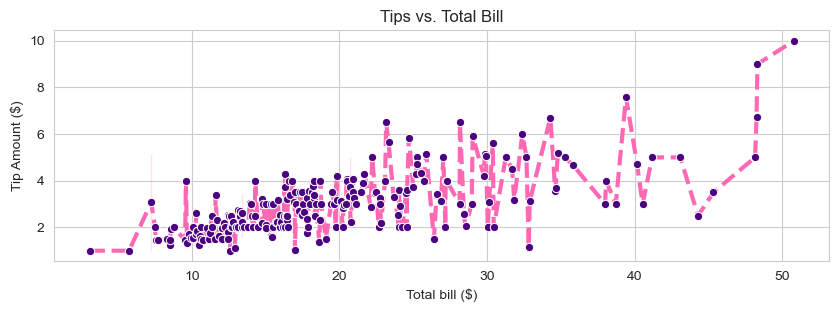

In [6]:
sns.set_style('whitegrid')

fig = plt.subplots(figsize=(10, 3))

tipgraph = sns.lineplot(data=tips,
             x = 'total_bill',
             y = 'tip',
             color = 'hotpink',
            linestyle = '--',
            linewidth = 3,
            marker = 'o',
            markerfacecolor = 'indigo')

tipgraph.set(title = 'Tips vs. Total Bill',
             xlabel = 'Total bill ($)',
             ylabel = 'Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

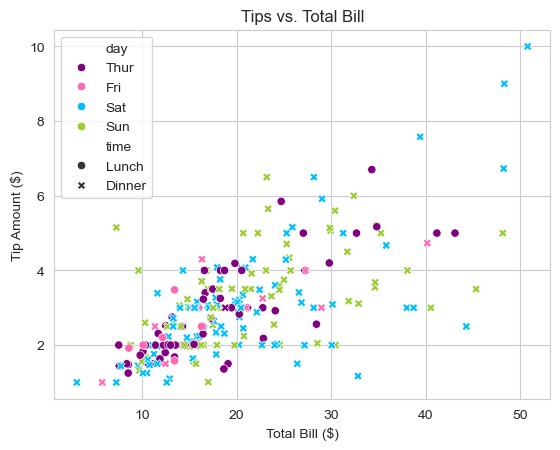

In [7]:
tipgraph = sns.scatterplot(data=tips, 
                           x = 'total_bill',
                            y = 'tip',
                            style = 'time', 
                            hue = 'day',
                            palette = ['purple','hotpink', 'deepskyblue', 'yellowgreen'])

tipgraph.set(title='Tips vs. Total Bill',
            xlabel='Total Bill ($)',
            ylabel='Tip Amount ($)')

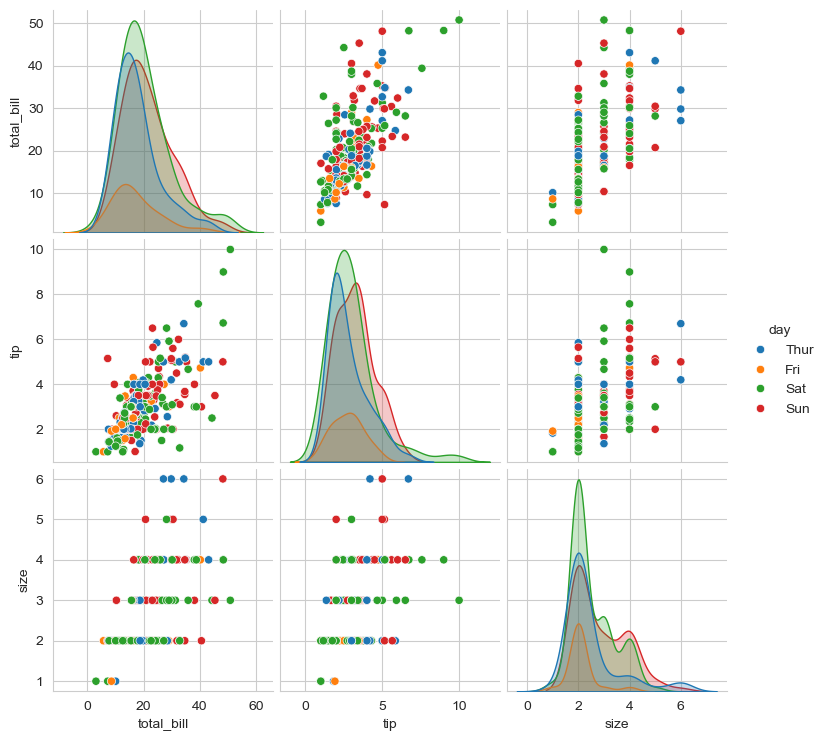

In [8]:
sns.pairplot(
      data = tips,
      hue = 'day')



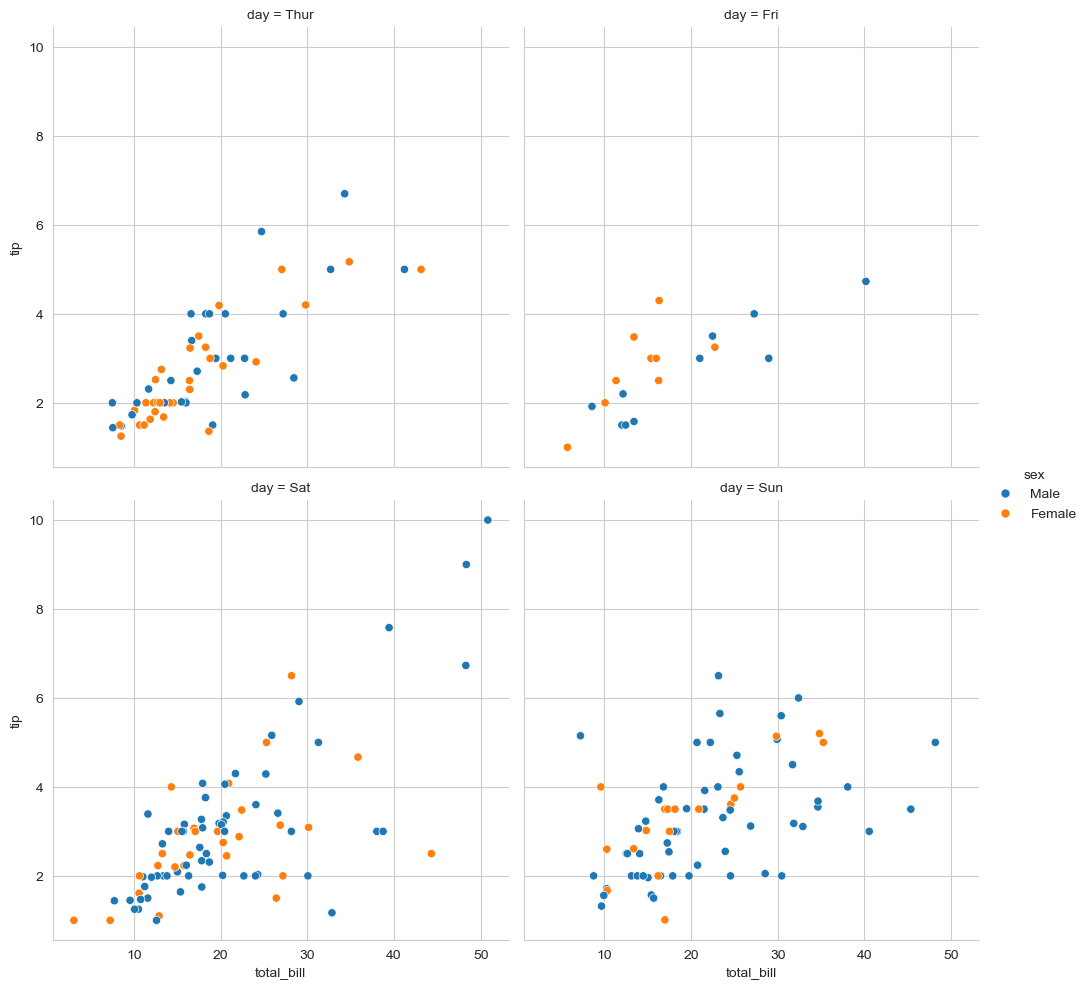

In [9]:
#Activity 1 - comments:

daysplot = sns.relplot(
            data=tips,       #we getting our dataset for plotting
            x="total_bill",  # setting name and valies for x-axis
            y="tip",         # setting name and values for y-axis
            hue="sex",       # set color while filtering by sex
            col="day",       # filtering it in relation to the day
            kind="scatter",  # type of our plot as scatter
            col_wrap=2)      # setting 2 plots per row

In [10]:
# Activity 2:
# First one states the fact and implying a specific thoughts. Second one is more interactive, so we can make our own decisions and conclusions 

In [11]:
import plotly.graph_objects as go     # 'go' is 'graph objects’
x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])

graph = go.Figure()
graph.add_trace(go.Bar(x=x1, y=y1))

graph.update_layout(
    title="Pirate Scores",
    xaxis_title="Pirates",
    yaxis_title="Score")
graph.show()

In [12]:
graph = go.Figure()
graph.add_trace(go.Scatter(x=x1, y=y1, mode='markers',    # we want points for a scatter plot
    marker=dict(
        size=15,                            # point size
        color='hotpink',                    # point colour
        opacity=1,                          # point transparency/alpha
        line=dict(width=5, color='purple')  # point outline
    )))
graph.update_layout(
    title='Interactive Pirate Plot',
    xaxis_title='Pirates',
    yaxis_title='Scores',
    width=500, height=500)

In [13]:
from wordcloud import WordCloud
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
on_bad_lines='skip')
df


,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


(-0.5, 399.5, 199.5, -0.5)

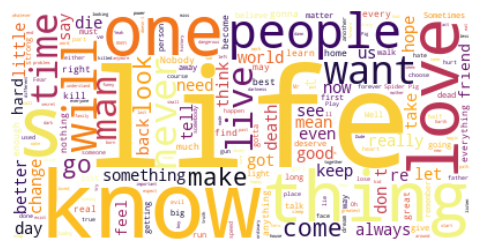

In [14]:
# join all our text from each row from our quote column into a string
text = " ".join(each for each in df.quote)
# generate our wordcloud image
wordcloud = WordCloud(background_color="white",
colormap = 'inferno').generate(text)
# use matplotlib syntax to put our image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud,                  # remember 'imshow' from when we added pictures to our matplotlib axes
        interpolation='bilinear')   # this line helps smooth our image
ax.axis("off")


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/matplotlib_venn/_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



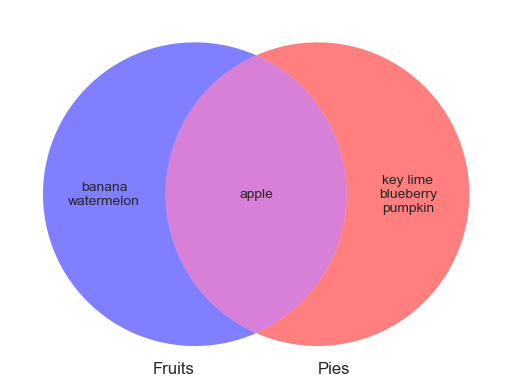

In [15]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

diagram = venn2_unweighted([A, B],
                            set_labels = ('Fruits', 'Pies'),
                            set_colors=("blue", "red"),
                            alpha=0.5)

diagram.get_label_by_id("10").set_text("\n".join(A - B))
diagram.get_label_by_id("11").set_text("\n".join(A & B))
diagram.get_label_by_id("01").set_text("\n".join(B - A))
plt.show()
